### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import os 
import seaborn as sns
import statistics
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

I'm also going to be experimenting with HoloViews and Bokeh to make the data visualizations more interactive. I previously tried to use mpld3, but mpld3 does not integrate with seaborn, since seaborn is not inherent in matplotlib.

In [2]:
%matplotlib inline
import matplotlib.pylab as plt
#import mpld3
#mpld3.enable_notebook()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
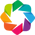

In [6]:
import holoviews as hv
from holoviews import dim, opts
import hvplot.pandas

hv.extension('bokeh', 'matplotlib')

In [7]:
import re
s = 'c141y_d228a_n235k_n239m' # example of mutation name, showing amino acid changes in 4 loci

In [8]:
re.findall('[0-9]+',s) # example string matching

['141', '228', '235', '239']

In [9]:
from google.colab import files
uploaded = files.upload()

Saving k8_clean_data.csv to k8_clean_data.csv


### Load the cleaned dataset

In [ ]:
# load in dataset
#mutants = pd.read_csv('../data/interim/k8_clean_data.csv', header=None, low_memory=False)
mutants = pd.read_csv('k8_clean_data.csv', header=None, low_memory=False)

In [ ]:
mutants.head()

0      1      2      3      4      5      6      7      8      9     ...  \
0 -0.161 -0.014  0.002 -0.036 -0.033 -0.093  0.025  0.005  0.000 -0.015  ...   
1 -0.158 -0.002 -0.012 -0.025 -0.012 -0.106  0.013  0.005  0.000 -0.002  ...   
2 -0.169 -0.025 -0.010 -0.041 -0.045 -0.069  0.038  0.014  0.008 -0.014  ...   
3 -0.183 -0.051 -0.023 -0.077 -0.092 -0.015  0.071  0.027  0.020 -0.019  ...   
4 -0.154  0.005 -0.011 -0.013 -0.002 -0.115  0.005  0.002 -0.003  0.002  ...   

    5400   5401   5402   5403   5404   5405   5406   5407               5408  \
0  0.013  0.021  0.020  0.016 -0.011  0.003  0.010 -0.007        a119e_l125p   
1 -0.008  0.007  0.015 -0.008 -0.011 -0.004  0.013  0.005  a119e_r283k_a353v   
2  0.010  0.025  0.025  0.021 -0.012  0.006  0.016 -0.018              c135y   
3  0.012  0.050  0.038  0.051 -0.015  0.017  0.027 -0.049        c135y_e285m   
4  0.012  0.009  0.003 -0.001  0.002 -0.006  0.009  0.013        c135y_e285v   

       5409  
0  inactive  
1  inactive  
2  inactive  
3  inactive  
4  inactive  

[5 rows x 5410 columns]

In [ ]:
# pull out the column of mutants with the nametags

nametags = mutants[5408].astype(str)
print(nametags)

0              a119e_l125p
1        a119e_r283k_a353v
2                    c135y
3              c135y_e285m
4              c135y_e285v
               ...        
16586    y220c_t230c_n239y
16587    y220c_y234f_n239l
16588                y234c
16589          y234c_a119e
16590          y234f_n239l
Name: 5408, Length: 16591, dtype: object


### Subset the data

subset the data! first implement analysis on subset, then apply same on full dataset

first, check the mutant tags to see where the mutations are in the amino acid chain, and then subset based on domains

will have 5 subsets, corresponding to each of the 5 major p53 domains!

In [ ]:
# create empty lists for each domain
# each list will store the indexes of the mutants (rows) for their respective protein domains

ad_loci = []
dbd_loci = []
td_loci = []
nls_loci = []
bd_loci = []

In [ ]:
def binner(num):
    if num <= 101:
        b = 0
    elif (num > 101) and (num < 305):
        b = 1
    elif (num >= 305) and (num < 326):
        b = 2
    elif (num >= 326) and (num < 364):
        b = 3
    else:
        b = 4
    return b

In [ ]:
# since there could be multiple loci, sort based on avg (center) of mutation loci

for tag in nametags:
        search = re.findall('[0-9]+', str(tag))
        snps = np.array(list(map(int, search)))
        bins = list(map(binner,snps))
        b = statistics.mode(bins)
        
#         avg = np.mean(snps)

        
        if b == 0:
            #t = nametags.index(nametags.loc[tag])
            ad_loci.append(mutants[mutants[5408] == tag])
            continue
        elif b == 1:
            #t = nametags.index(tag)
            dbd_loci.append(mutants[mutants[5408] == tag])
            continue
        elif b == 2:
            #t = nametags.index(tag)
            td_loci.append(mutants[mutants[5408] == tag])
            continue
        elif b == 3:
            #t = nametags.index(tag)
            nls_loci.append(mutants[mutants[5408] == tag])
            continue
        elif b == 4:
            #t = nametags.index(tag)
            bd_loci.append(mutants[mutants[5408] == tag])
            continue
        
            

# make sure to check the size of each subset

In [ ]:
len(ad_loci)

0

In [ ]:
len(dbd_loci)

16591

In [ ]:
len(td_loci)

0

In [ ]:
len(nls_loci)

0

In [ ]:
len(bd_loci)

0

In [ ]:
#ad_loci = pd.concat(nls_loci)

In [ ]:
# maybe add in the different methods used to partition the data in this way for comparison of the results

I tried splitting the dataset up by the domain that contained the mutation loci, but that did not work. 

Splitting the mutants by protein domain provided wildly imbalanced subsets, since it seems that the overwhelming majority of the mutants have at least one mutation in the DBD domain of p53. 
We can look at the domain-wise distribution of the p53 mutations to confirm this. 

A more even way to partition the dataset would probably be to partition by the number of mutations per mutant - one, two, three, or four and more mutations.

In [ ]:
singles = [] # one mutation
doubles = [] # two mutations
triples = [] # three mutations
multis = [] # four or more mutations

In [ ]:
# subset data based on the number of mutations per mutant protein

for tag in nametags:
        search = re.findall('[0-9]+', str(tag))
        snps = np.array(list(map(int, search)))
        num_loci = len(snps)
        
        if num_loci == 1:
            #t = nametags.index(nametags.loc[tag])
            singles.append(mutants[mutants[5408] == tag])
        elif num_loci == 2:
            #t = nametags.index(tag)
            doubles.append(mutants[mutants[5408] == tag])
        elif num_loci == 3:
            #t = nametags.index(tag)
            triples.append(mutants[mutants[5408] == tag])
        elif num_loci >= 4:
            #t = nametags.index(tag)
            multis.append(mutants[mutants[5408] == tag])
        
# make sure to check the size of each subset

In [ ]:
singles = pd.concat(singles)
doubles = pd.concat(doubles)
triples = pd.concat(triples)
multis = pd.concat(multis)

In [ ]:
singles.shape

(61, 5410)

In [ ]:
doubles.shape

(16374, 5410)

In [ ]:
triples.shape

(114, 5410)

In [ ]:
multis.shape # four or more mutations

(42, 5410)

Splitting the dataset this way also gave us imbalanced subsets, but not *quite* as imbalanced as they were when separated by protein domain. We can see that the majority of mutants in the dataset have only two mutations, and single mutations or three or more mutations are less common.

Is there perhaps a relationship between the number of mutations and the mutation loci? 

*One idea is to randomly subset the rows of the dataset for the preprocessing. Otherwise, if possible, we could make synthetic data to supplement the subsets.*

## Data Visualization with PCA

Let's try visualizing with PCA to find some trends in the data. We'll then plot the data with t-SNE and compare the results.

[Reference](https://medium.com/analytics-vidhya/pca-vs-t-sne-17bcd882bf3d#:~:text=t%2DSNE%20is%20also%20a,large%20pairwise%20distance%20maximize%20variance.&text=It%20takes%20a%20set%20of,it%20into%20low%20dimensional%20data)

In [ ]:
mutants.shape # cleaned starting dataset

(16591, 5410)

In [ ]:
labels = mutants[5409] # target variable labels
tags = mutants[5408] # mutant tag names

In [ ]:
# dropping labels and tags from mutants data and storing in a new variable, m
m = mutants.drop([5408, 5409], axis=1)

In [ ]:
m.shape

(16591, 5408)

In [ ]:
labels.shape

(16591,)

In [ ]:
tags.shape

(16591,)

In [ ]:
m.head() # only numerical data

0      1      2      3      4      5      6      7      8      9     ...  \
0 -0.161 -0.014  0.002 -0.036 -0.033 -0.093  0.025  0.005  0.000 -0.015  ...   
1 -0.158 -0.002 -0.012 -0.025 -0.012 -0.106  0.013  0.005  0.000 -0.002  ...   
2 -0.169 -0.025 -0.010 -0.041 -0.045 -0.069  0.038  0.014  0.008 -0.014  ...   
3 -0.183 -0.051 -0.023 -0.077 -0.092 -0.015  0.071  0.027  0.020 -0.019  ...   
4 -0.154  0.005 -0.011 -0.013 -0.002 -0.115  0.005  0.002 -0.003  0.002  ...   

    5398   5399   5400   5401   5402   5403   5404   5405   5406   5407  
0 -0.015  0.006  0.013  0.021  0.020  0.016 -0.011  0.003  0.010 -0.007  
1 -0.007  0.002 -0.008  0.007  0.015 -0.008 -0.011 -0.004  0.013  0.005  
2 -0.016  0.019  0.010  0.025  0.025  0.021 -0.012  0.006  0.016 -0.018  
3 -0.028  0.051  0.012  0.050  0.038  0.051 -0.015  0.017  0.027 -0.049  
4  0.027 -0.011  0.012  0.009  0.003 -0.001  0.002 -0.006  0.009  0.013  

[5 rows x 5408 columns]

In [ ]:
# Standardizing data
standardized_m = StandardScaler().fit_transform(m)
standardized_m.shape

(16591, 5408)

In [ ]:
# co-variance of matrix
sample_data = standardized_m
cov_matrix = np.matmul(sample_data.T, sample_data)
cov_matrix.shape

(5408, 5408)

In [ ]:
from scipy.linalg import eigh

In [ ]:
# calculating top two eigenvectors for projecting onto a 2D space
values, vectors = eigh(cov_matrix, eigvals=(5406, 5407))
print(vectors.shape)
vectors = vectors.T
print(vectors.shape)

(5408, 2)
(2, 5408)


In [ ]:
# projecting original data sample on plane formed by two principal eigenvectors by vector-vector multiplication
new_coord = np.matmul(vectors, sample_data.T)
new_coord.shape

(2, 16591)

In [ ]:
# appending labels and tags to the 2D projection of the data
new_coord = np.vstack((new_coord, labels, tags)).T

In [ ]:
# new dataframe for plotting labeled 2D projection
df = pd.DataFrame(data=new_coord, columns=("1st_Principal", "2nd_Principal", "Labels", "Tags"))
df.head()

1st_Principal 2nd_Principal    Labels               Tags
0      -14.7834       -13.133  inactive        a119e_l125p
1      -21.1552       4.27032  inactive  a119e_r283k_a353v
2       15.2744      -8.29186  inactive              c135y
3        11.052      -31.7136  inactive        c135y_e285m
4        28.884       16.3317  inactive        c135y_e285v

In [ ]:
df.shape

(16591, 4)

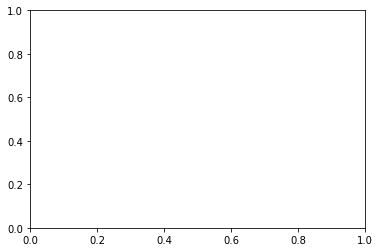

In [ ]:
# plotting 2D datapoints with seaborn
# would this work better if the Labels were encoded as 1s and 0s?

fig, ax = plt.subplots()

scatter = sns.FacetGrid(df, palette='pastel', hue="Labels", height=6).map(plt.scatter, '1st_Principal', '2nd_Principal').add_legend()
#fig = plt.gcf()

# attempt 1 to hover-label points on plot with mpld3
tooltip = mpld3.plugins.PointLabelTooltip(fig, labels=list(df.Labels))
mpld3.plugins.connect(fig, tooltip)

mpld3.display()
#plt.show()

In [ ]:
labels.value_counts() # blue points are inactive, orange points are active

inactive    16449
active        142
Name: 5409, dtype: int64

The orange dots, or "active" mutants, seem to have around 4 to 6 clusters. This is very interesting and should be explored further! I wonder if this pattern could be further elucidated through t-SNE plots?

In [ ]:
# initialize PCA
from sklearn import decomposition
pca = decomposition.PCA()

In [ ]:
# configuring the number of components
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

print("shape of the reduced PCA = ", pca_data.shape)

shape of the reduced PCA =  (16591, 2)


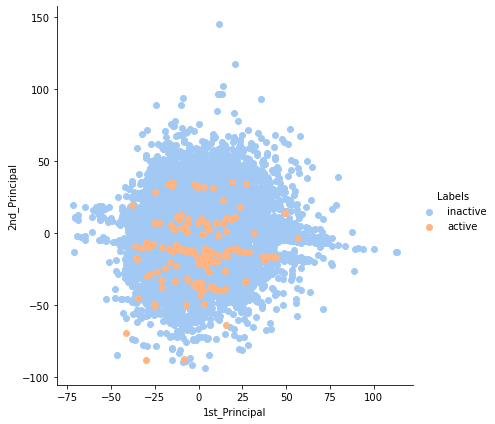

In [ ]:
# appending labels to PCA data
pca_data = np.vstack((pca_data.T, labels)).T

# new dataframe to plot the PCA results
pca_df = pd.DataFrame(pca_data, columns=("1st_Principal", "2nd_Principal", "Labels"))
sns.FacetGrid(pca_df, palette='pastel', hue="Labels", height=6).map(plt.scatter, '1st_Principal', '2nd_Principal').add_legend()
plt.show()

The PCA plot with 2 principal components shows 5 or 6 groups of "active" (orange) mutants. These groups or clusters are arranged somewhat in lines. These groups of "active" mutants and why they are clustered like that could be interesting to look into further!



*   large feature overlap
*   not easily separable
*   could try rotating the data before plotting (see [Holoviews PCA](https://necromuralist.github.io/Neurotic-Networking/posts/nlp/pca-exploration/#orgac0cc33))



## Visualizing Results of t-SNE

Now, I will use a non-linear method of visualization for highly dimensional data to get more insights into the data, as well as to compare results with the observations from PCA.

References:


*   [Reading t-SNE plots](https://distill.pub/2016/misread-tsne/)
*   [PCA vs t-SNE](https://medium.com/analytics-vidhya/pca-vs-t-sne-17bcd882bf3d#:~:text=t%2DSNE%20is%20also%20a,large%20pairwise%20distance%20maximize%20variance.&text=It%20takes%20a%20set%20of,it%20into%20low%20dimensional%20data)


In [ ]:
from sklearn.manifold import TSNE

In [ ]:
# if TSNE takes too long for all of the points, just pick the top 1000 points, but try with the full dataset first
model = TSNE(n_components=2, random_state=420)
samples = standardized_m
# default perplexity = 30
# default epsilon (learning rate) = 200
# default Maximum number of iteration for the optimization = 1000

tsne_data = model.fit_transform(samples)

# new df to help plot resulting data
tsne_data = np.vstack((tsne_data.T, labels)).T # not really important to append the tags, just the labels for now
tsne_df = pd.DataFrame(data=tsne_data, columns=('Dim_1', 'Dim_2', 'label'))

# plot resulting t-SNE model

sns.FacetGrid(tsne_df, palette='pastel', hue='label', height=8).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

In [ ]:
model = TSNE(n_components=2, random_state=420, perplexity=50) # try with top 1000 data points first

samples_1000 = standardized_m[0:1000,:]
labels_1000 = labels[0:1000]

tsne_data = model.fit_transform(samples_1000)

# new df to help plot resulting data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T # not really important to append the tags, just the labels for now
tsne_df = pd.DataFrame(data=tsne_data, columns=('Dim_1', 'Dim_2', 'label'))

# plot resulting t-SNE model

sns.FacetGrid(tsne_df, palette='pastel', hue='label', height=8).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

**Increasing the perplexity** results in [insert comparison of this plot with previous one]

In [ ]:
model = TSNE(n_components=2, random_state=420, perplexity=80) # try with top 1000 data points first

samples_1000 = standardized_m[0:1000,:]
labels_1000 = labels[0:1000]

tsne_data = model.fit_transform(samples_1000)

# new df to help plot resulting data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T 
tsne_df = pd.DataFrame(data=tsne_data, columns=('Dim_1', 'Dim_2', 'label'))

# plot resulting t-SNE model

sns.FacetGrid(tsne_df, palette='pastel', hue='label', height=8).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('t-SNE plot with perplexity = 80')
plt.show()

There is a grouping of five orange dots in the top right corner, indicating similarity between those "active" mutants. This is interesting! Let's isolate this grouping and further investigate.

I want to repeat t-SNE after performing dimensionality reduction techniques and further analyze the results by comparing to the plots of the original dataset.